In this notebook I will plot and analyse the light data from Qiq recorded in 2020

In [1]:
# This chunk imports the packages that you need. 
#If you get errors, you need to install the package in the terminal (in the right directory) 
#(pip install "packagename" OR conda install "packagename")

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Plotting settings
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '17', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Read data from .csv data

In [3]:
# Change to your path
filename = 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Qik/QiqAll2020_lightdata.csv'

In [4]:
light_csv = pd.read_csv(filename,header=0)
print(light_csv)

      yyyy  mm  dd  HH  MM  SS        lat       long  Vbatt  nodeNum  ...  \
0     2020   3   1   1  53  37  67.480088 -63.804740   15.0        1  ...   
1     2020   3   1   2   0  31  67.480173 -63.804748   15.0        1  ...   
2     2020   3   1   3   0   7  67.480137 -63.804893   15.0        1  ...   
3     2020   3   1   4   0   8  67.480115 -63.804823   15.0        1  ...   
4     2020   3   1   5   0   9  67.480196 -63.805172   15.0        1  ...   
...    ...  ..  ..  ..  ..  ..        ...        ...    ...      ...  ...   
2838  2020   6  27  11  16  33  67.480303 -63.804738   13.3        1  ...   
2839  2020   6  27  12   0  10  67.480260 -63.804538   13.3        1  ...   
2840  2020   6  27  13   0  31  67.480095 -63.804736   13.3        1  ...   
2841  2020   6  27  14   0   6  67.480102 -63.804817   13.3        1  ...   
2842  2020   6  27  15   0   6  67.480150 -63.804855   13.4        1  ...   

         UWW.9     UWB.9  nodeNum.10    DWO.10    DWW.10    DWB.10   UWO.10

### Depth nodes

In [5]:
# From email with Phil [SAMS]
depths = [0,1,2,3,4,5,7,14,21,32,50]

The light string has 11 nodes. These values are in number of counts per 1000 seconds (mHz) but can be converted to PAR with the calibration. 

## Calibrate (2019 cal)

"the data I send to you in the csv is in "number of counts per 1000 seconds*" i.e. the data are in units of milliHertz (mHz). So, the conversion number in the figure in in units of "(microMol per second per metre squared) PER mHz multiply the (usually large) number in the csv file by  5.392x10^-7 ( + - 2.538 x 10^-8) to get your PAR" - From email with Phil (SAMS)- Light data Qikiqtarjua


In [6]:
cal_value = 5.392 * 10**(-7)
cal_sd = 2.538 * 10**(-8) 

In [7]:
light_csv

,yyyy,mm,dd,HH,MM,SS,lat,long,Vbatt,nodeNum,...,UWW.9,UWB.9,nodeNum.10,DWO.10,DWW.10,DWB.10,UWO.10,UWW.10,UWB.10,Unnamed: 86
0,2020,3,1,1,53,37,67.480088,-63.804740,15.0,1,...,1.0,1.0,11,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,2020,3,1,2,0,31,67.480173,-63.804748,15.0,1,...,1.0,1.0,11,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,2020,3,1,3,0,7,67.480137,-63.804893,15.0,1,...,1.0,1.0,11,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,2020,3,1,4,0,8,67.480115,-63.804823,15.0,1,...,1.0,1.0,11,1.0,1.0,1.0,1.0,1.0,1.0,NaN
4,2020,3,1,5,0,9,67.480196,-63.805172,15.0,1,...,1.0,1.0,11,1.0,1.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,2020,6,27,11,16,33,67.480303,-63.804738,13.3,1,...,121151.0,237362.0,11,273000.0,863000.0,305000.0,11868.0,17092.0,11716.0,NaN
2839,2020,6,27,12,0,10,67.480260,-63.804538,13.3,1,...,76033.0,148389.0,11,195779.0,622000.0,222179.0,7985.0,12844.0,9417.0,NaN
2840,2020,6,27,13,0,31,67.480095,-63.804736,13.3,1,...,90243.0,172821.0,11,247520.0,790000.0,290000.0,10386.0,16355.0,12025.0,NaN
2841,2020,6,27,14,0,6,67.480102,-63.804817,13.3,1,...,94620.0,165388.0,11,270000.0,814000.0,305000.0,10223.0,17088.0,12775.0,NaN


### Set up timestamp

In [8]:
# rename columns so that to_datetime recongnises them
light_csv['year'] = light_csv['yyyy']
light_csv['month'] = light_csv['mm']
light_csv['day'] = light_csv['dd']
light_csv['hour'] = light_csv['HH']
light_csv['minute'] = light_csv['MM']
light_csv['second'] = light_csv['SS']

light_csv['datetime'] = pd.to_datetime(light_csv[{'year','month','day','hour','minute','second'}])

### Set up profile arrays for each light type
Organize with time on the 1st dimensions.
Each node /depth in the 2nd dimension.\
For each light type:\
DWO - DownWelling  Orange\
DWW - DownWelling  White \
DWB - DownWelling  Blue\
UWO - UpWelling  Orange\
UWW - UpWelling  White\
UWB - UpWelling  Blue

Apply the calibration coefficient to convert from mHz to PAR.

In [9]:
# Allocate space in the variable by makind an empty array
# Organize by light type


PAR_DWW = np.zeros([len(light_csv['DWW']),11])
PAR_DWO = np.zeros([len(light_csv['DWO']),11])
PAR_DWB = np.zeros([len(light_csv['DWB']),11])

PAR_UWW = np.zeros([len(light_csv['UWW']),11])
PAR_UWO = np.zeros([len(light_csv['UWO']),11])
PAR_UWB = np.zeros([len(light_csv['UWB']),11])


# The first values name doesnt match the pattern, Do it first
PAR_DWW[:,0] = light_csv['DWW']*cal_value
PAR_DWO[:,0] = light_csv['DWO']*cal_value
PAR_DWB[:,0] = light_csv['DWB']*cal_value

PAR_UWW[:,0] = light_csv['UWW']*cal_value
PAR_UWO[:,0] = light_csv['UWO']*cal_value
PAR_UWB[:,0] = light_csv['UWB']*cal_value

for ind in range(1,11): # 11 nodes.
    PAR_DWW[:,ind] = light_csv['DWW.%d' %ind]*cal_value
    PAR_DWO[:,ind] = light_csv['DWO.%d' %ind]*cal_value
    PAR_DWB[:,ind] = light_csv['DWB.%d' %ind]*cal_value

    PAR_UWW[:,ind] = light_csv['UWW.%d' %ind]*cal_value
    PAR_UWO[:,ind] = light_csv['UWO.%d' %ind]*cal_value
    PAR_UWB[:,ind] = light_csv['UWB.%d' %ind]*cal_value

# Plot plot plot

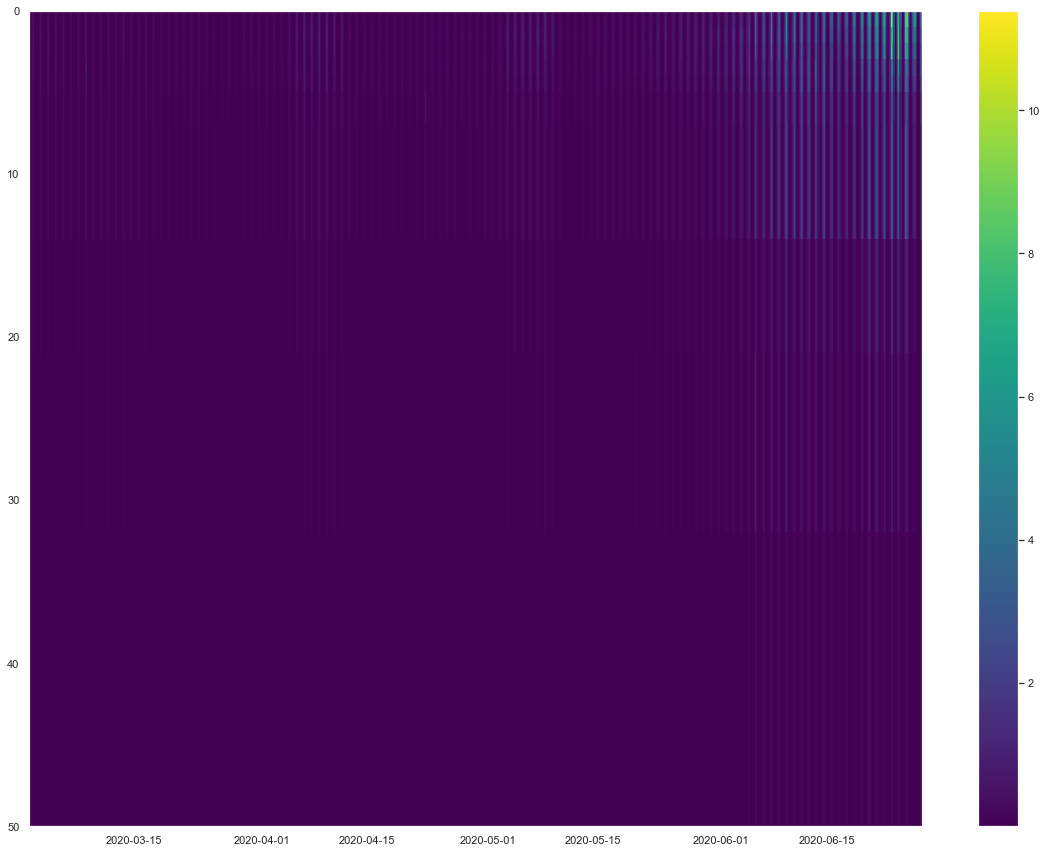

In [10]:
fig=plt.figure(figsize=(20, 15),facecolor='w', edgecolor='k')
plt.pcolor(light_csv['datetime'],depths, PAR_UWW.T, cmap='viridis')
plt.ylim([0,50])
plt.gca().invert_yaxis()
plt.colorbar()

### Compare colour filter

Text(0.5, 1.0, 'Downwelling sensor color comparison')

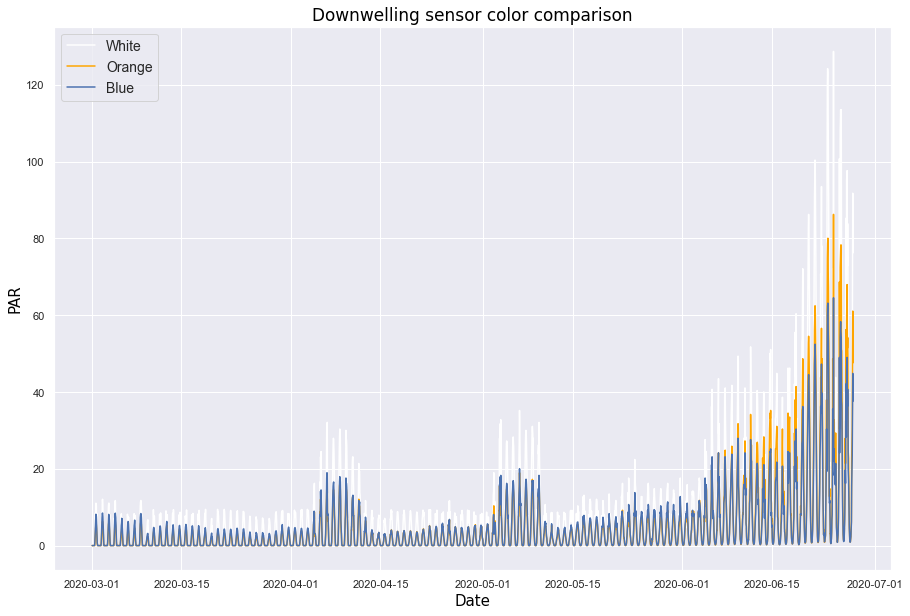

In [11]:
depth_ind = 1

fig=plt.figure(figsize=(15, 10),facecolor='w', edgecolor='k')
plt.plot(light_csv['datetime'],PAR_DWW[:,depth_ind], 'w', label='White')
plt.plot(light_csv['datetime'],PAR_DWO[:,depth_ind], 'orange', label='Orange')
plt.plot(light_csv['datetime'],PAR_DWB[:,depth_ind], 'b', label='Blue')
plt.legend(fontsize=14)
plt.ylabel('PAR', axis_font)
plt.xlabel('Date', axis_font)
plt.title('Downwelling sensor color comparison', title_font)

DEPTH 0-15 m: The downwelling light measure a fraction of light depending on the filter colour. White measuring the most, followed by orange then blue. At low light levels (<25 PAR) orange and blue detect similar light levels.

DEPTH 15+m : White sensors are still measuring higher values of PAR but blue detects higher light values at depths below 15m than the sensors with the orange filter

Text(0.5, 1.0, 'Upwelling sensor color comparison')

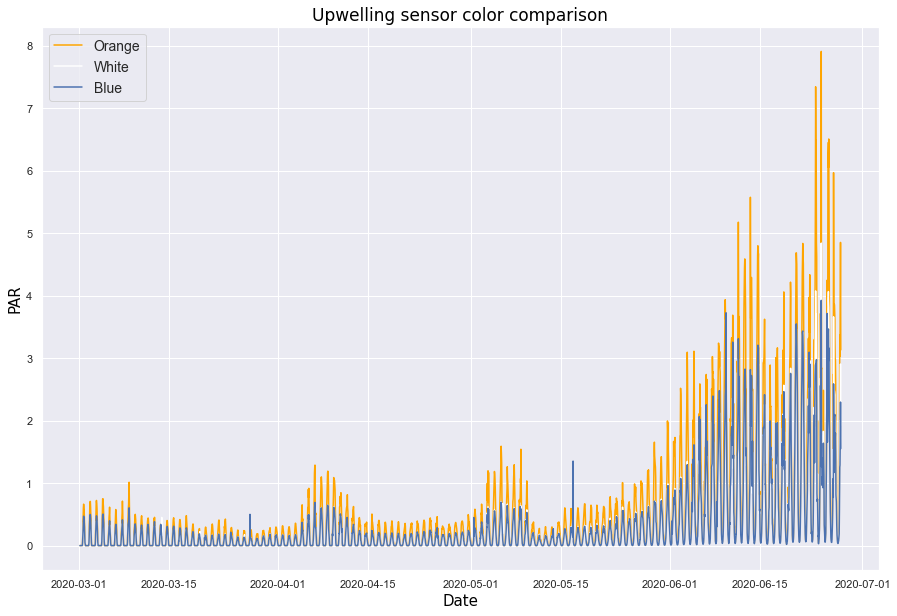

In [12]:
depth_ind = 4
fig=plt.figure(figsize=(15, 10),facecolor='w', edgecolor='k')

plt.plot(light_csv['datetime'],PAR_UWO[:,depth_ind], 'orange', label='Orange')
plt.plot(light_csv['datetime'],PAR_UWW[:,depth_ind], 'w', label='White')
plt.plot(light_csv['datetime'],PAR_UWB[:,depth_ind], 'b', label='Blue')


plt.legend(fontsize=14)
plt.ylabel('PAR', axis_font)
plt.xlabel('Date', axis_font)
plt.title('Upwelling sensor color comparison', title_font)

DEPTH 0-5m: The same filter effect is not observed in the upwelling sensors. Sensors with or without filters (blue or orange) detect similar light values. None of the sensors and filters are consistently large. The filter with orange filter may have slightly higher values.

DEPTH 7-50m: Blue filter sensor tends to measure higher values of PAR than orange. White (no filter) tends to measure lower PAR values

Both upwelling and downwelling sensors have "bad data" at the deepest node (spikes). Upwelling no data. Downwelling, a couple orange sensor spikes

<BarContainer object of 2843 artists>

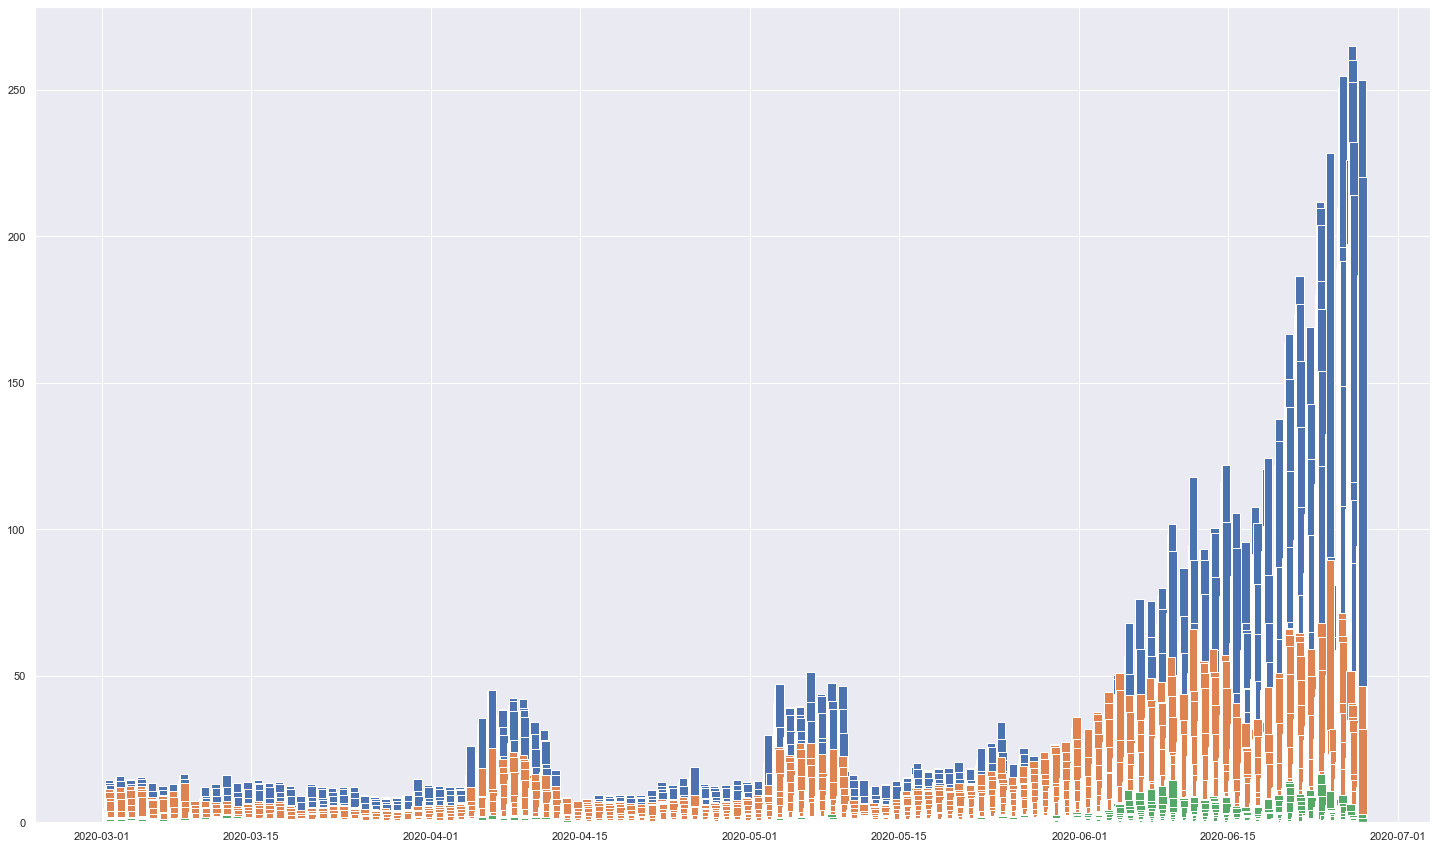

In [13]:
fig=plt.figure(figsize=(25, 15),facecolor='w', edgecolor='k')
plt.bar(light_csv['datetime'], PAR_DWW[:,0])
plt.bar(light_csv['datetime'], PAR_DWW[:,5])
plt.bar(light_csv['datetime'], PAR_DWW[:,9])

## Look into times with highter PAR?
I expect the curve to be exponentially increasing as the days approach summer solstice. I noticed two approximately 1 weeks periods in early april and early may with much higher PAR than the preceeding and proceeding weeks. It can be seen at all depths

In [14]:
# Resample data into daily maximums
light_max = light_csv.set_index('datetime').resample('D').max()

In [ ]:
# Make rough function for max possible irradiance (PAR)

Text(0.5, 0, 'Date')

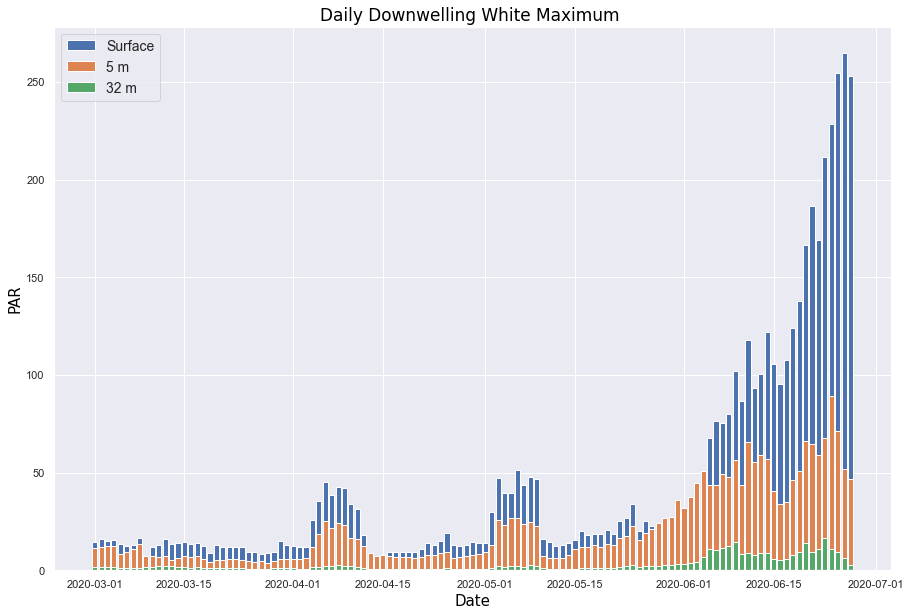

In [18]:
# Plot daily maximum at different depths
fig=plt.figure(figsize=(15, 10),facecolor='w', edgecolor='k')
plt.bar(light_max.index, light_max['DWW']*cal_value, label='Surface')
plt.bar(light_max.index, light_max['DWW.5']*cal_value, label='5 m')
plt.bar(light_max.index, light_max['DWW.9']*cal_value, label='32 m')
plt.title('Daily Downwelling White Maximum ', title_font)
plt.legend(fontsize=14)
plt.ylabel('PAR', axis_font)
plt.xlabel('Date', axis_font)